In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.style.use('ggplot')

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=4)
y = y.reshape(y.shape[0], 1)

dims = X.shape, y.shape
print(f'Dimensions of X and y: {dims}')

Dimensions of X and y: ((100, 2), (100, 1))


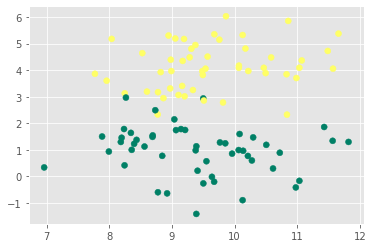

In [5]:
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap='summer',
)

In [6]:
# inistialization of Weights and bias
def initialize(x):
  W = np.random.randn(x.shape[1])
  b = np.random.randn(1)

  return W, b

In [7]:
W, b = initialize(X)
W.shape, b.shape

((2,), (1,))